In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
customer_profile = pd.read_csv("customer_profile.csv")

# Traditional methods

In [3]:
# Define rfm_level function
def rfm_level(df):
    if df["RFM_Score"] >= 10:
        return "High Value Customer"
    elif (df["RFM_Score"] < 10) & (df["RFM_Score"] >= 6):
        return "Mid Value Customer"
    else:
        return "Low Value Customer"


# Create a new variable RFM_Level
customer_profile["RFM_Level"] = customer_profile.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
# print(customer_profile.head())

# Unsupervised Learning

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

customer_profile_scaled = customer_profile.copy()
customer_profile_scaled["Recency"] = scaler.fit_transform(customer_profile[["Recency"]])
customer_profile_scaled["Frequency"] = scaler.fit_transform(
    customer_profile[["Frequency"]]
)
customer_profile_scaled["MonetaryValue"] = scaler.fit_transform(
    customer_profile[["MonetaryValue"]]
)
customer_profile_scaled["Total Discount"] = scaler.fit_transform(
    customer_profile[["Total Discount"]]
)
customer_profile_scaled["Total Quantity"] = scaler.fit_transform(
    customer_profile[["Total Quantity"]]
)
customer_profile_scaled["Age"] = scaler.fit_transform(customer_profile[["Age"]])

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_cols = [
    "Total Quantity",
    # 'Total Discount',
    # 'MonetaryValue',
    # 'Recency',
    # 'Frequency',
    "Age",
]

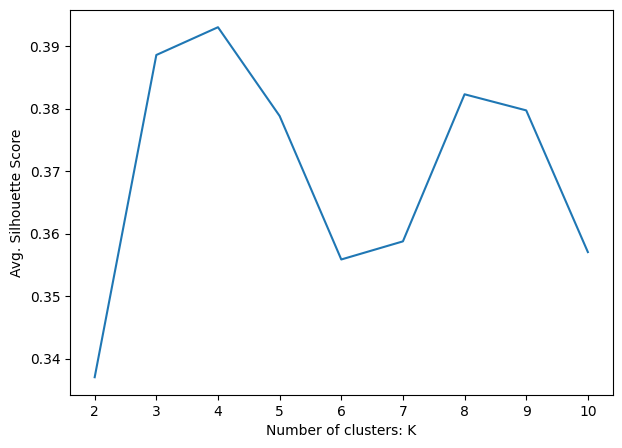

In [6]:
X = customer_profile_scaled[cluster_cols]

silhouette_scores = []

for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=[7, 5])
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of clusters: K")
plt.ylabel("Avg. Silhouette Score")
plt.show()

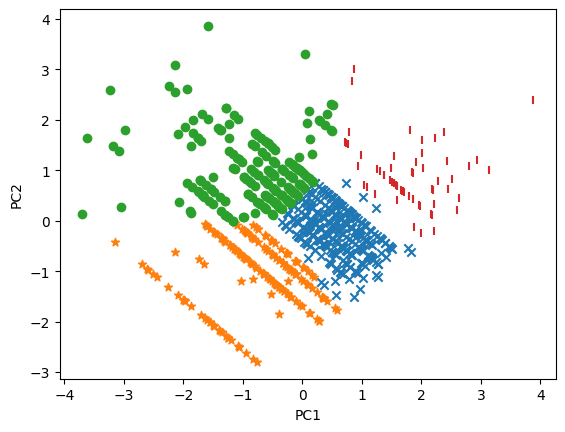

In [7]:
n_clusters = 4
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(customer_profile_scaled[cluster_cols])

customer_profile_scaled["Cluster"] = model.predict(
    customer_profile_scaled[cluster_cols]
)

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(customer_profile_scaled[cluster_cols])

customer_profile_scaled["pc1"] = pca_res[:, 0]
customer_profile_scaled["pc2"] = pca_res[:, 1]

markers = ["x", "*", "o", "|"]

for clust in range(n_clusters):
    temp = customer_profile_scaled[customer_profile_scaled.Cluster == clust]
    plt.scatter(
        temp.pc1, temp.pc2, marker=markers[clust], label="Cluster " + str(clust)
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [8]:
customer_profile["Cluster"] = customer_profile_scaled.Cluster
customer_profile.groupby("Cluster")[cluster_cols].mean()

,Total Quantity,Age
Cluster,,
0,57.456140,42.824561
1,72.322581,34.580645
2,138.810000,42.135000
3,53.234375,51.546875


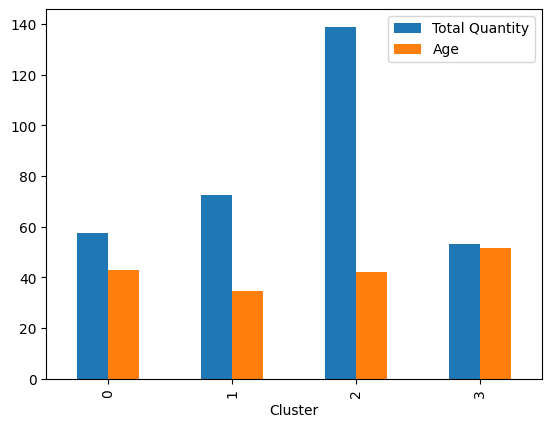

In [9]:
customer_profile.groupby("Cluster")[cluster_cols].mean().plot.bar()
plt.show()